In [62]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


image_path = "C:\\Users\\ahtis\\OneDrive\\Documents\\Course\\FCV\\dataset\\Cat\\2015_03135.jpg"
print("Using sample:", image_path)

# Read grayscale + color
img_gray = cv2.imread(str(image_path), cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(str(image_path), cv2.IMREAD_COLOR)
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

Using sample: C:\Users\ahtis\OneDrive\Documents\Course\FCV\dataset\Cat\2015_03135.jpg


# Plotter

In [63]:

def plot_image_and_histogram(original, enhanced, title, cmap="gray"):
    """Show image side-by-side with histograms"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))

    if cmap == "gray":
        axes[0,0].imshow(original, cmap='gray')
        axes[0,1].imshow(enhanced, cmap='gray')
    else:
        axes[0,0].imshow(original)
        axes[0,1].imshow(enhanced)

    axes[0,0].set_title("Original")
    axes[0,0].axis("off")

    axes[0,1].set_title(title)
    axes[0,1].axis("off")

    if cmap == "gray":
        axes[1,0].hist(original.ravel(), bins=256, range=(0,256), color='blue')
        axes[1,1].hist(enhanced.ravel(), bins=256, range=(0,256), color='red')
    else:
        # Histogram for color images
        colors = ("r","g","b")
        for i, col in enumerate(colors):
            axes[1,0].hist(original[:,:,i].ravel(), bins=256, range=(0,256), color=col, alpha=0.5)
            axes[1,1].hist(enhanced[:,:,i].ravel(), bins=256, range=(0,256), color=col, alpha=0.5)

    axes[1,0].set_title("Original Histogram")
    axes[1,1].set_title(f"{title} Histogram")

    plt.tight_layout()
    plt.show()

def apply_per_channel(image, func):
    """Apply enhancement per channel for color images"""
    channels = cv2.split(image)
    processed = [func(ch) for ch in channels]
    return cv2.merge(processed)


# Histogram Equilization

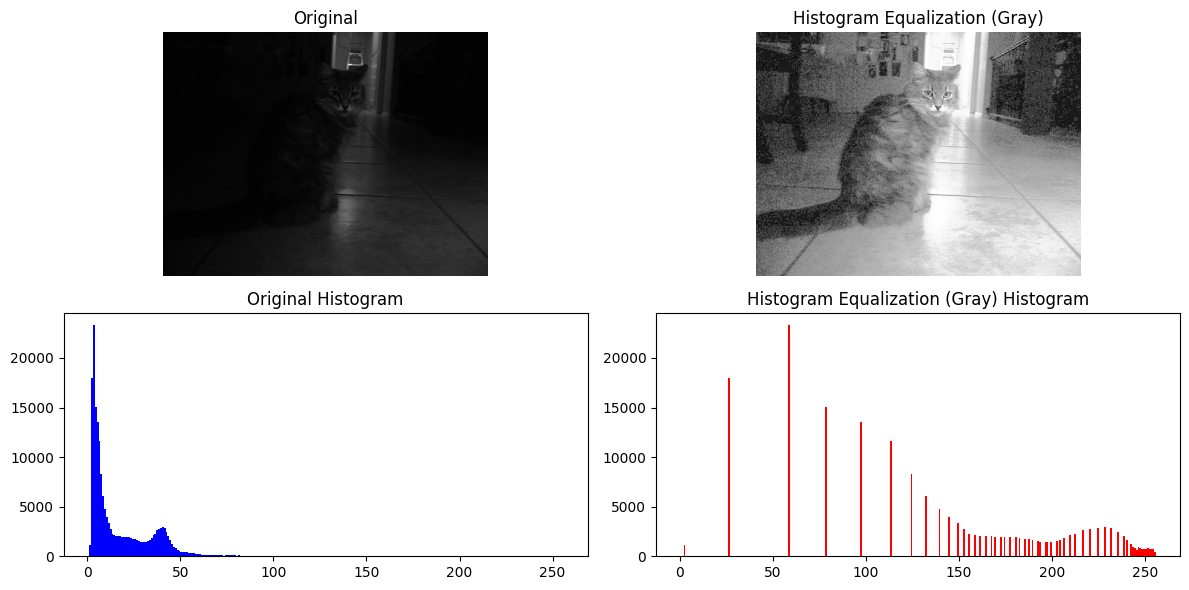

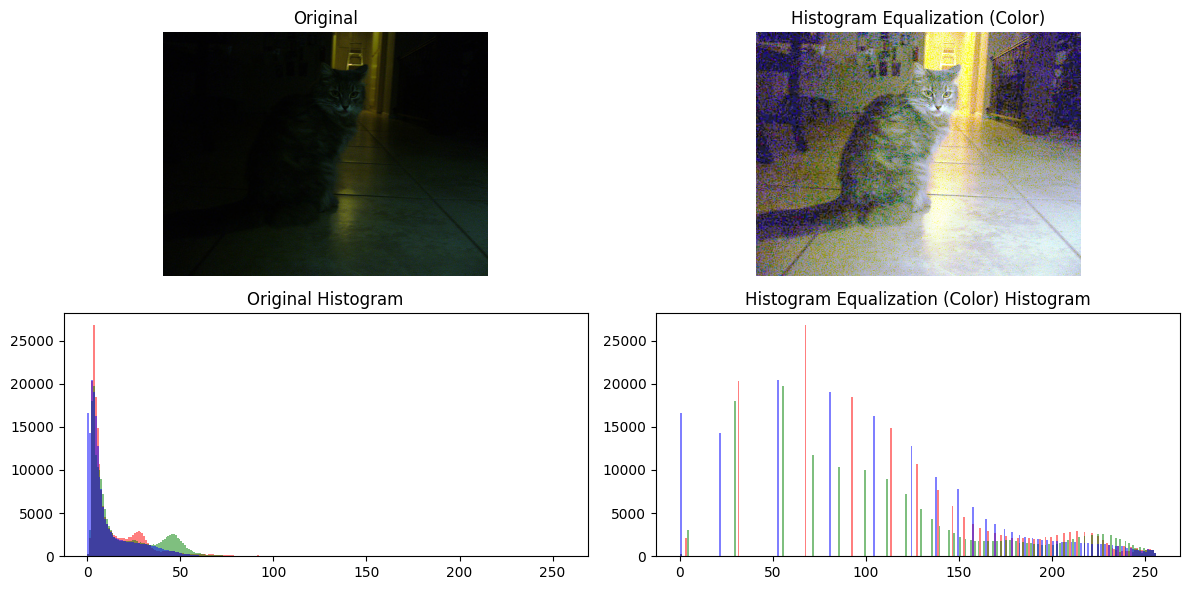

In [64]:

hist_eq_gray = cv2.equalizeHist(img_gray)
hist_eq_color = apply_per_channel(img_color, cv2.equalizeHist)

plot_image_and_histogram(img_gray, hist_eq_gray, "Histogram Equalization (Gray)")
plot_image_and_histogram(img_color, hist_eq_color, "Histogram Equalization (Color)", cmap="color")


# Log Transformation

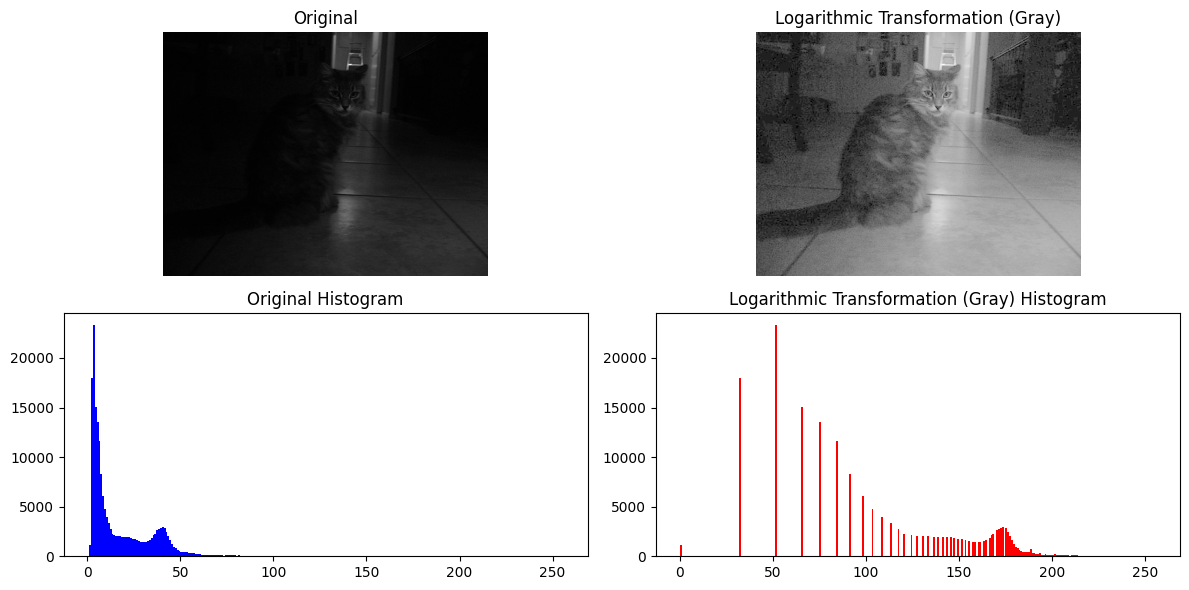

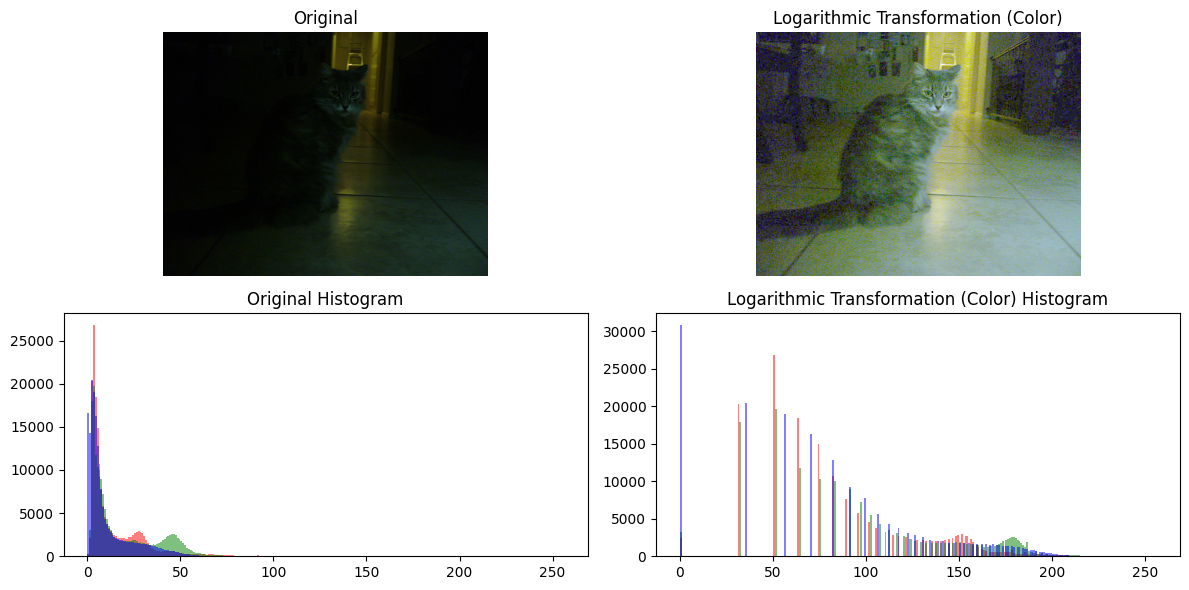

In [65]:

def log_transform(image):
    image = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image))
    log_img = c * np.log(image + 1e-5)  # epsilon to avoid log(0)
    log_img = np.clip(log_img, 0, 255)
    return log_img.astype(np.uint8)

log_gray = log_transform(img_gray)
log_color = apply_per_channel(img_color, log_transform)

plot_image_and_histogram(img_gray, log_gray, "Logarithmic Transformation (Gray)")
plot_image_and_histogram(img_color, log_color, "Logarithmic Transformation (Color)", cmap="color")


# Both

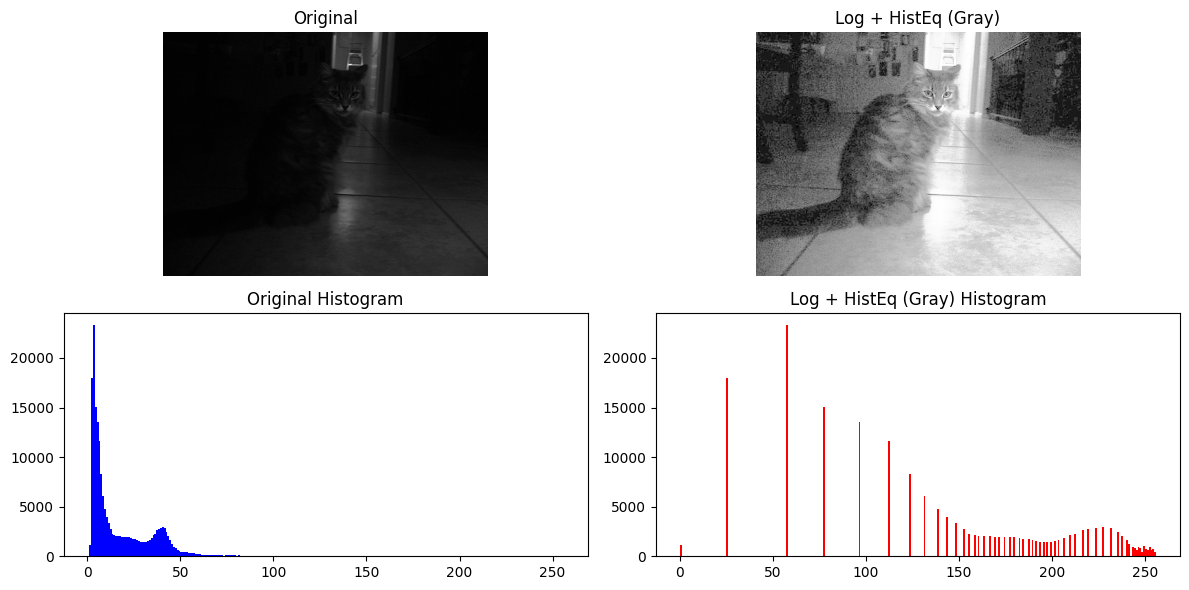

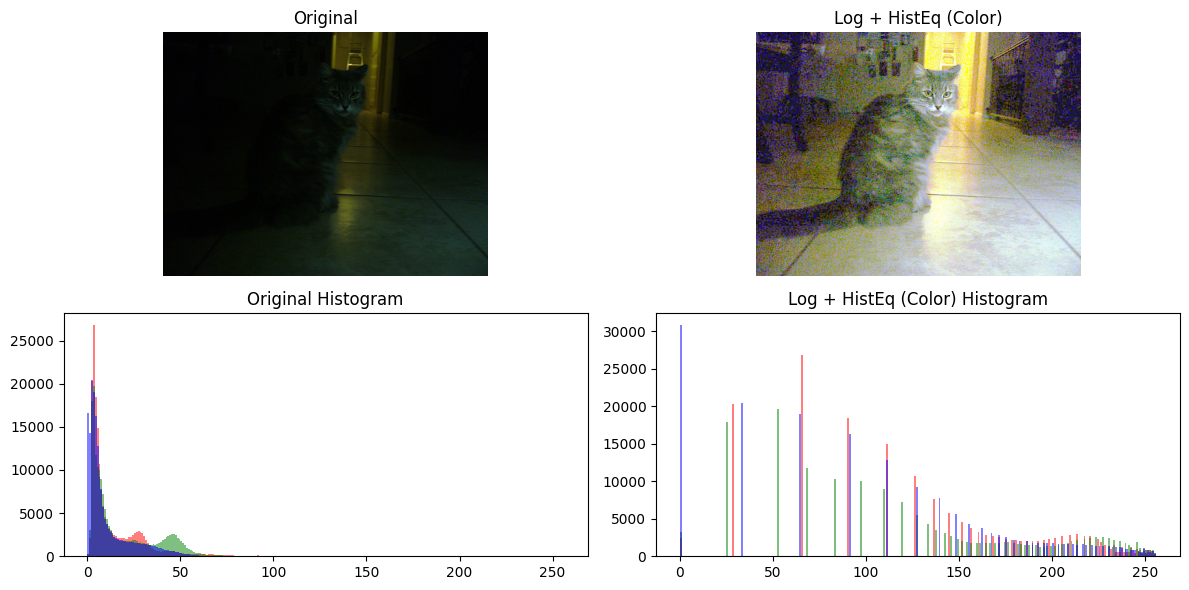

In [66]:

combo_gray = cv2.equalizeHist(log_gray)
combo_color = apply_per_channel(log_color, cv2.equalizeHist)

plot_image_and_histogram(img_gray, combo_gray, "Log + HistEq (Gray)")
plot_image_and_histogram(img_color, combo_color, "Log + HistEq (Color)", cmap="color")


# Save output


In [67]:


Path("output").mkdir(exist_ok=True)

cv2.imwrite("output/result_hist_eq_gray.jpg", hist_eq_gray)
cv2.imwrite("output/result_hist_eq_color.jpg", cv2.cvtColor(hist_eq_color, cv2.COLOR_RGB2BGR))
cv2.imwrite("output/result_log_gray.jpg", log_gray)
cv2.imwrite("output/result_log_color.jpg", cv2.cvtColor(log_color, cv2.COLOR_RGB2BGR))
cv2.imwrite("output/result_combo_gray.jpg", combo_gray)
cv2.imwrite("output/result_combo_color.jpg", cv2.cvtColor(combo_color, cv2.COLOR_RGB2BGR))


True